In [1]:
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pylab as plt
import ot
import ot.plot

import numpy as np
from pyslime import utils as pu
import pyslime.pipeline.pipelineUtils as ppu


bpslime_dir = '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-10-12/BP_z=0_float32'
bpslime_datafile='trace_BP_z=0_float32.bin'
sdss_slime_dir = '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-10-12/SDSS_z=0.1_float32'
sdss_datafile = 'trace_SDSS_z=0.1_float32.bin'


In [2]:
# import data
nostd_sdss_slime32 = pu.get_slime(sdss_slime_dir, datafile=sdss_datafile, dtype=np.float32, standardize=False)
nostd_bpslime32 = pu.get_slime(bpslime_dir, datafile=bpslime_datafile, dtype=np.float32, standardize=False)

nostd_flatbpslime = nostd_bpslime32.data.flatten()
nostd_flatsdssslime = nostd_sdss_slime32.data.flatten()

(624, 1024, 608) (0, 1, 2)
(608, 1024, 624)


/Users/mwilde/python/pyslime/pyslime/utils.py:328: RuntimeWarning: divide by zero encountered in log10
  bpslime.data = np.log10(bpslime.data)


(720, 720, 720) (0, 1, 2)
(720, 720, 720)


In [11]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
b = ot.datasets.make_1D_gauss(n, m=60, s=10)

In [47]:
n = 1000
bins = np.linspace(-4, 4, n)

# Gaussian distributions
a,_  = np.histogram(nostd_flatbpslime, bins)
b,_ = np.histogram(nostd_flatsdssslime, bins)


In [49]:
bincenters = 0.5*bins[1:] + 0.5*bins[:-1]
bincenters.shape

(999,)

In [55]:
# loss matrix
M = ot.dist(bincenters.reshape((len(bincenters), 1)), bincenters.reshape((len(bincenters), 1)))
# M /= M.max()


In [56]:
a.shape, b.shape, M.shape

((999,), (999,), (999, 999))

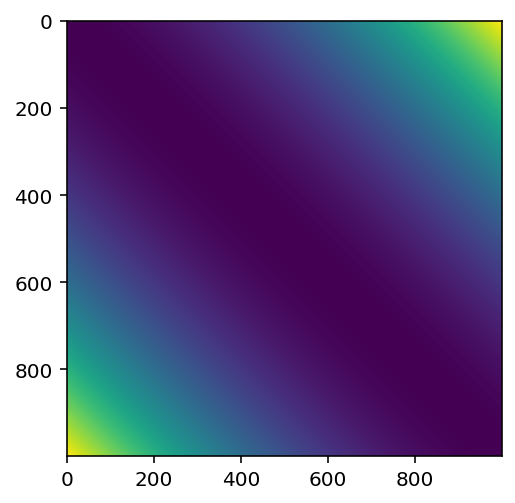

In [59]:
plt.imshow(M)

/Users/mwilde/opt/anaconda3/lib/python3.8/site-packages/ot/lp/__init__.py:276: UserWarning: Problem infeasible. Check that a and b are in the simplex
  result_code_string = check_result(result_code)


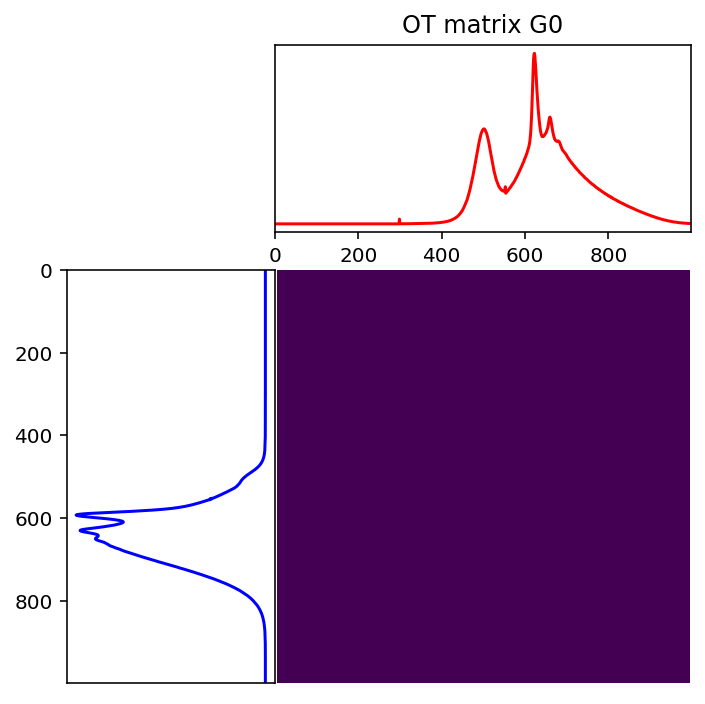

In [57]:
G0 = ot.emd(a, b, M)

plt.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')